In [12]:
from matplotlib import pyplot

import numpy as np
import time
from geometry import Node, Circle, enumerate_intersecting_leaves, enumerate_pairs, \
    contact_3circle_inside, contact_3cricle, norm2, norm, enumerate_leaves

%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

import colorsys


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Field

In [116]:
# c1 = np.array([0.4, 0.3]); r1 = 0.10
# c2 = np.array([0.7, 0.5]); r2 = 0.25

c1 = np.array([0, 1]); r1 = 1
c2 = np.array([0, -1]); r2 = 1

circles = [(c1, r1), (c2, r2)]


rs = np.random.RandomState(123)
tot1 = tot2 = 0
for i in range(150): 
    r3 = rs.rand() ** 1.5 + 0.05
    nc = len(circles)
    c3s = []
    for j in range(nc):
        c1, r1 = circles[j]
        for k in range(j + 1, nc): 
            c2, r2 = circles[k]
            for c3 in contact_3cricle(c1, r1, c2, r2, r3): 
                # check if intersection with other circles 
                for l in range(nc): 
                    tot1 += 1
                    if l == k or l == j: 
                        continue
                    cl, rl = circles[l]
                    if norm2(c3 - cl) < (rl + r3) ** 2: 
                        break 
                else: 
                    c3s.append(c3)
                    tot2 += 1
    print(f"{i=:} nb c3: {len(c3s)} {tot1=:} {tot2=:}", end="\r", flush=True)
    if False: 
        # pick the c3 that has lowest y
        c3s.sort(key=lambda x: x[1])
    else: 
        # pick the c3 that is closest to 0
        c3s.sort(key=lambda x: norm2(x))
    c3 = c3s[0]
    #print(f"{c3=:}")
    circles.append((c3, r3))
    
        

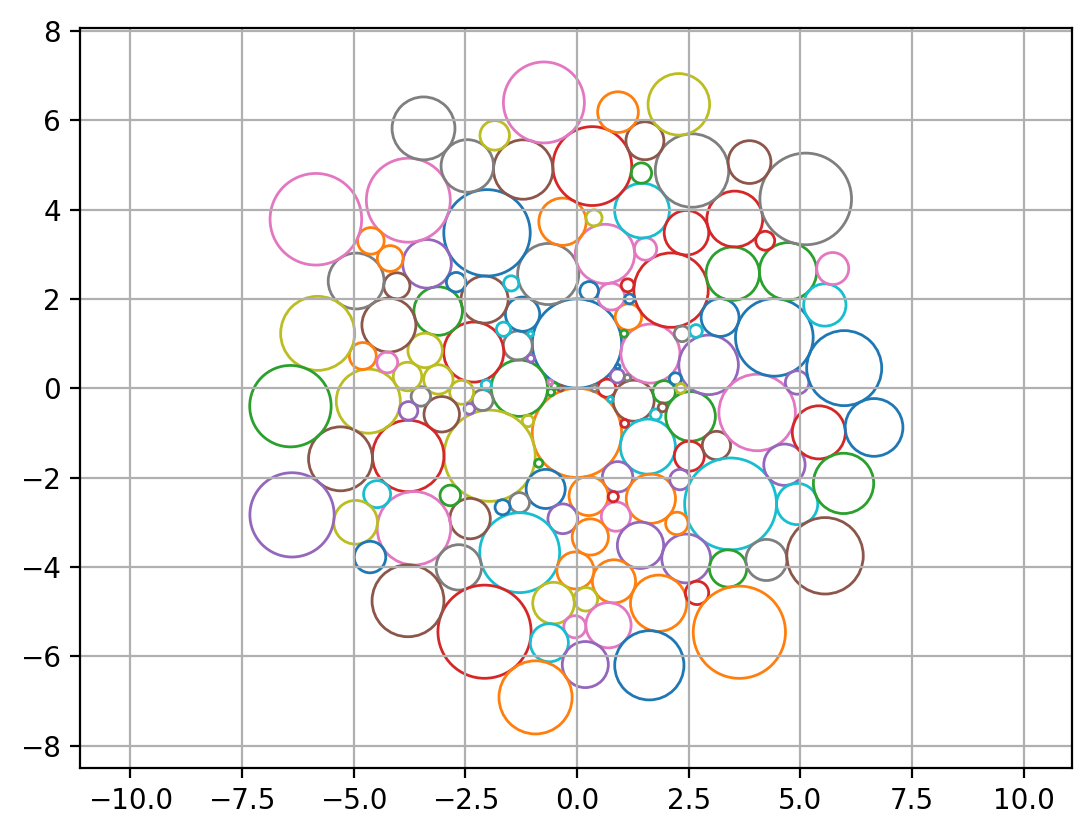

In [121]:
ax = pyplot.gca()
i = 0
for c, r in circles: 
    ax.add_patch(pyplot.Circle(c, r, color='C%d' % i, fill=False))
    i += 1

pyplot.axis("equal")
pyplot.grid()

## Gravity

In [65]:


def generate_circles_gravity(c0, r0, c1, r1, radiuses): 
    circles = [(c1, r1)]

    tot1 = tot2 = 0
    for i, r3 in enumerate(radiuses): 
        # r3 = 0.25 * rs.rand() ** 3 + 0.01
        nc = len(circles)
        c3s = []
        
        # check contact with great circle 
        for k in range(nc): 
            c2, r2 = circles[k]
            for c3 in contact_3circle_inside(c2, r2, c0, r0, r3): 
                for l in range(nc): 
                    tot1 += 1
                    if l == k: 
                        continue
                    cl, rl = circles[l]
                    if norm2(c3 - cl) < (rl + r3) ** 2: 
                        break 
                else: 
                    c3s.append(c3)
                    tot2 += 1

        for j in range(nc):
            c1, r1 = circles[j]
            for k in range(j + 1, nc): 
                c2, r2 = circles[k]
                for c3 in contact_3cricle(c1, r1, c2, r2, r3): 
                    # check if intersection with other circles 
                    for l in range(nc): 
                        tot1 += 1
                        if l == k or l == j: 
                            continue
                        cl, rl = circles[l]
                        if norm2(c3 - cl) < (rl + r3) ** 2: 
                            break 
                    else: 
                        if norm(c0 - c3) + r3 < r0: 
                            c3s.append(c3)
                            tot2 += 1
        if len(c3s) == 0: 
            continue
        if True: 
            # pick the c3 that has lowest y
            c3s.sort(key=lambda x: x[1])
        else: 
            # pick the c3 that is closest to 0
            c3s.sort(key=lambda x: norm2(x))
        c3 = c3s[0]
        #print(f"{c3=:}")
        circles.append((c3, r3))
        print(f"{i=:} nb circles: {len(circles)} "
              f"nb c3: {len(c3s)} {tot1=:} {tot2=:}", end="\r", flush=True)

    return circles
        

## Explore powers 

p= 1
i=243 nb circles: 50 nb c3: 6 tot1=595161 tot2=202317


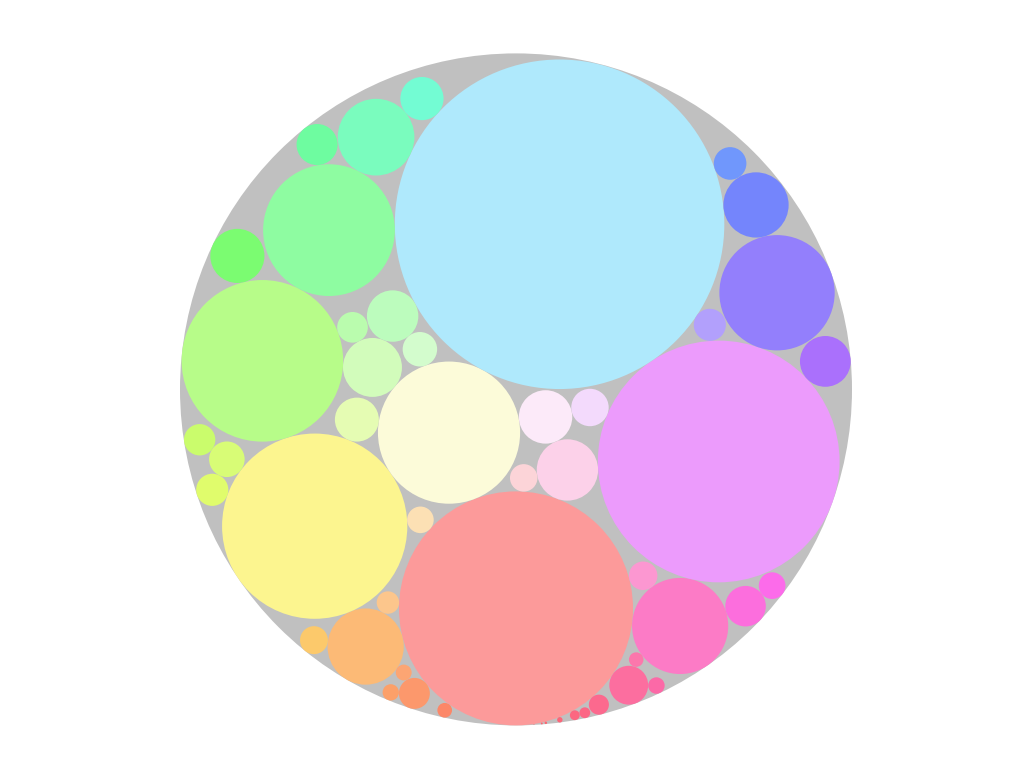

p= 2
i=243 nb circles: 105 nb c3: 304 tot1=3186952 tot2=11860


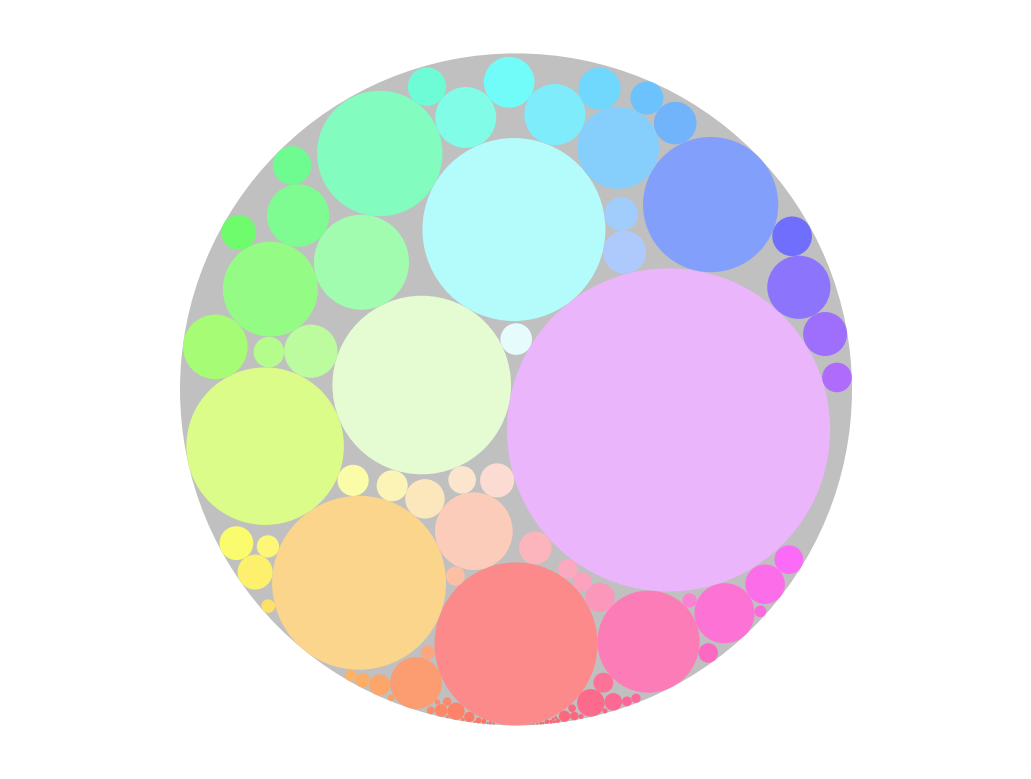

p= 3
i=246 nb circles: 149 nb c3: 136 tot1=7105283 tot2=23574


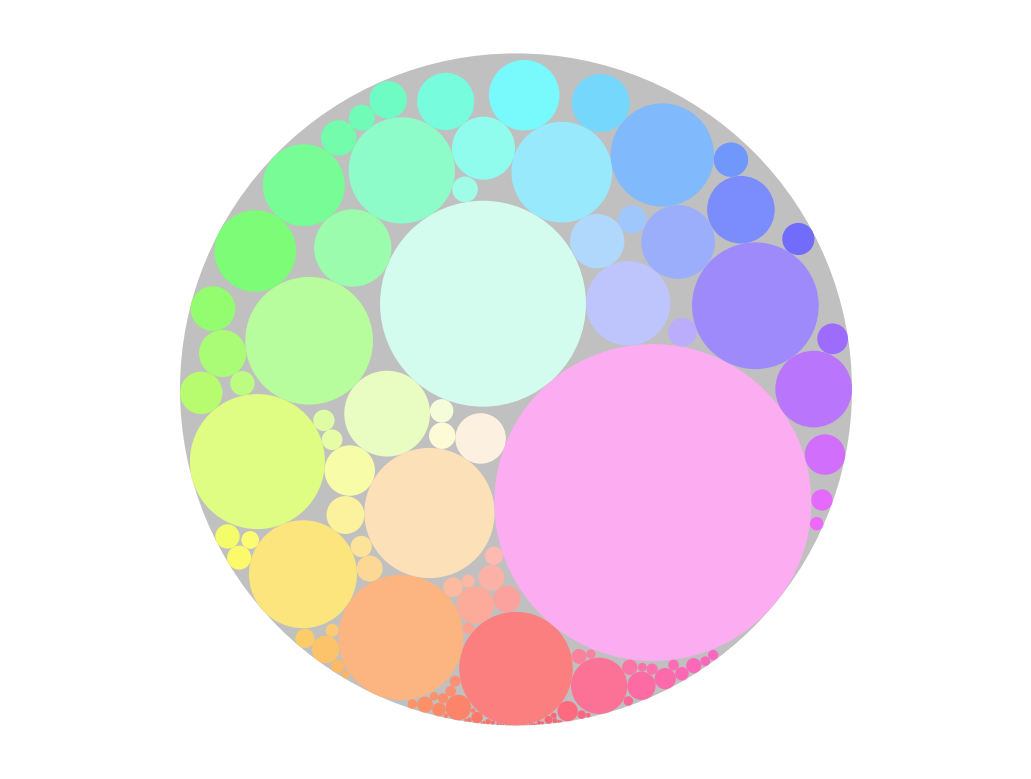

p= 5
i=246 nb circles: 199 nb c3: 429 tot1=12291825 tot2=39972


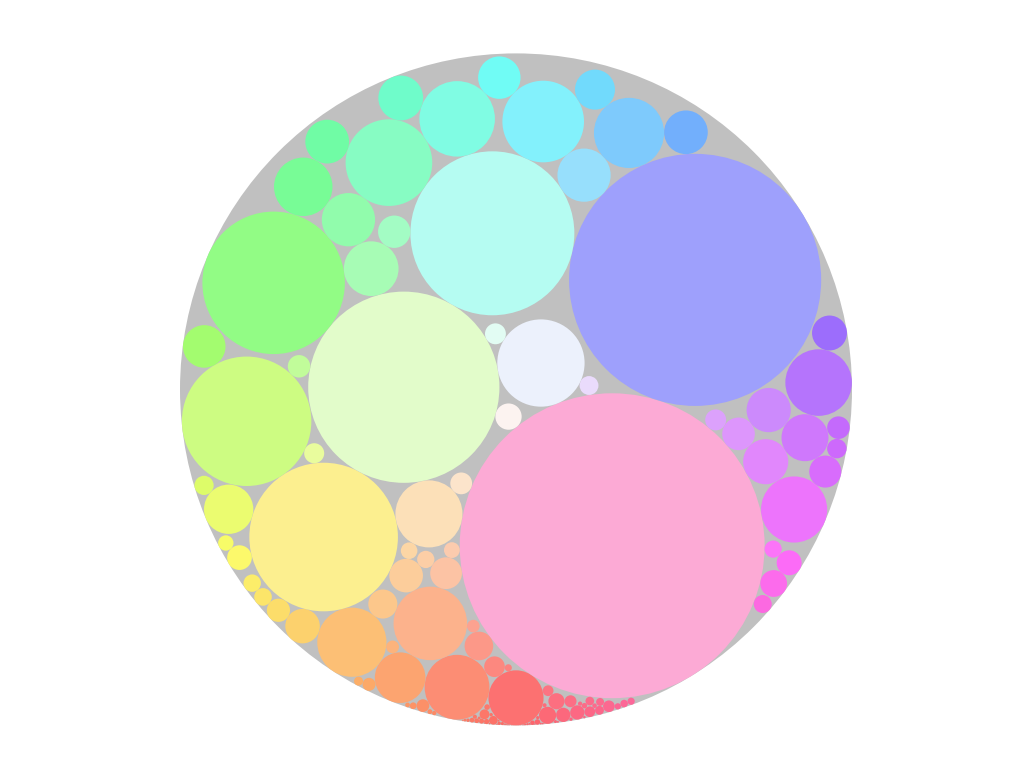

p= 8
i=246 nb circles: 223 nb c3: 574 tot1=15256741 tot2=49575


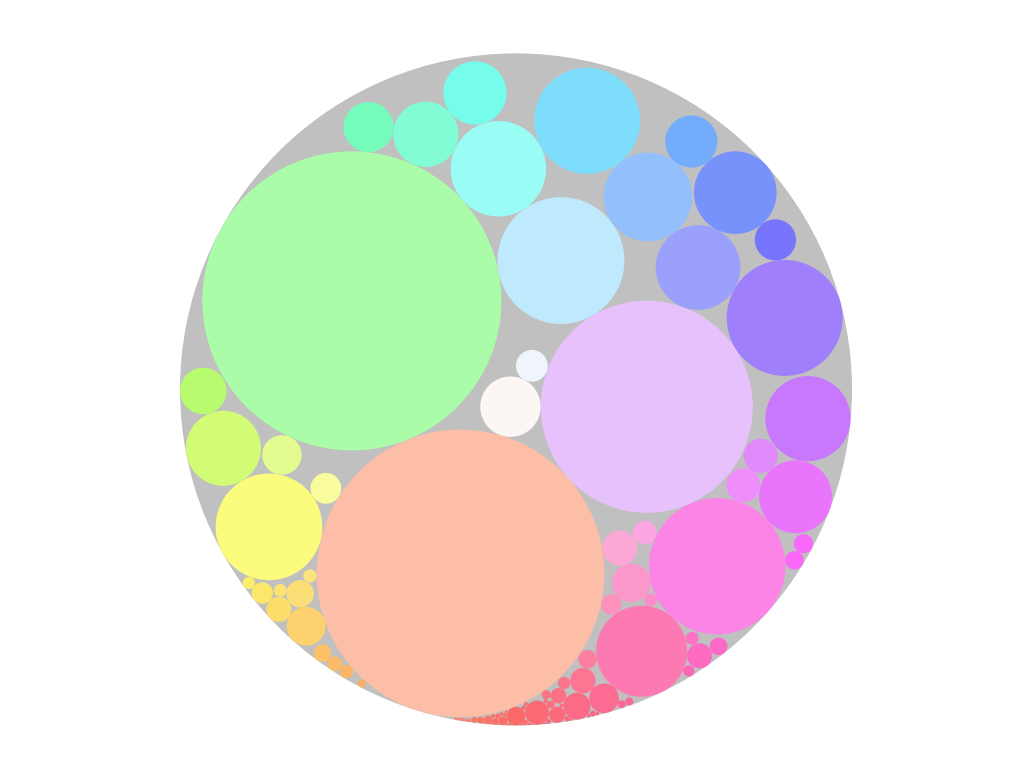

In [272]:
c0 = np.array([0, 0]); r0 = 1
c2 = np.array([0, -0.7]); r2 = 0.3
# minsize = 0.01

for p in 1, 2, 3, 5, 8:
    print("p=", p)

    rs = np.random.RandomState(123)

    radiuses = [0.5 * rs.rand() ** p for _ in range(250)]
    # radiuses.sort(reverse=True)
    #print(radiuses)
    r0 = radiuses[0]
    circles = generate_cicles_gravity(
        np.array([0, 0]), 1,
        np.array([0, -1 + r0]), r0,
        radiuses[1:]
    )

    print()

    ax = pyplot.gca()
    # pyplot.gcf().set_size_inches(7, 10)
    pyplot.axis('off')

    ax.add_patch(pyplot.Circle((0, 0), 1, color="#c0c0c0", fill=True, linewidth=0))

    for c, r in circles: 
        x, y = c 
        rho, theta = np.hypot(x, y), np.arctan2(x, y)
        color = colorsys.hsv_to_rgb(
            (theta / (2 * np.pi) + 0.5) % 1, 
            0.6 * rho, 
            0.99
        )
        ax.add_patch(pyplot.Circle(c, r, color=color, fill=True, linewidth=0))

    pyplot.axis("equal")
    pyplot.show()

# Recursive 

In [273]:
rs = np.random.RandomState(123)

all_circles = []

for i in range(5): 
    print("run", i)
    radiuses = [0.5 * rs.rand() ** 3 for _ in range(250)]
    # radiuses.sort(reverse=True)
    #print(radiuses)
    r0 = radiuses[0]
    circles = generate_cicles_gravity(
        np.array([0, 0]), 1,
        np.array([0, -1 + r0]), r0,
        radiuses[1:]
    )
    all_circles.append(circles)

run 0
run 1 nb circles: 149 nb c3: 136 tot1=7105283 tot2=23574
run 2 nb circles: 158 nb c3: 28 tot1=7090254 tot2=224124
run 3 nb circles: 133 nb c3: 252 tot1=5366238 tot2=18279
run 4 nb circles: 163 nb c3: 218 tot1=7189812 tot2=23503


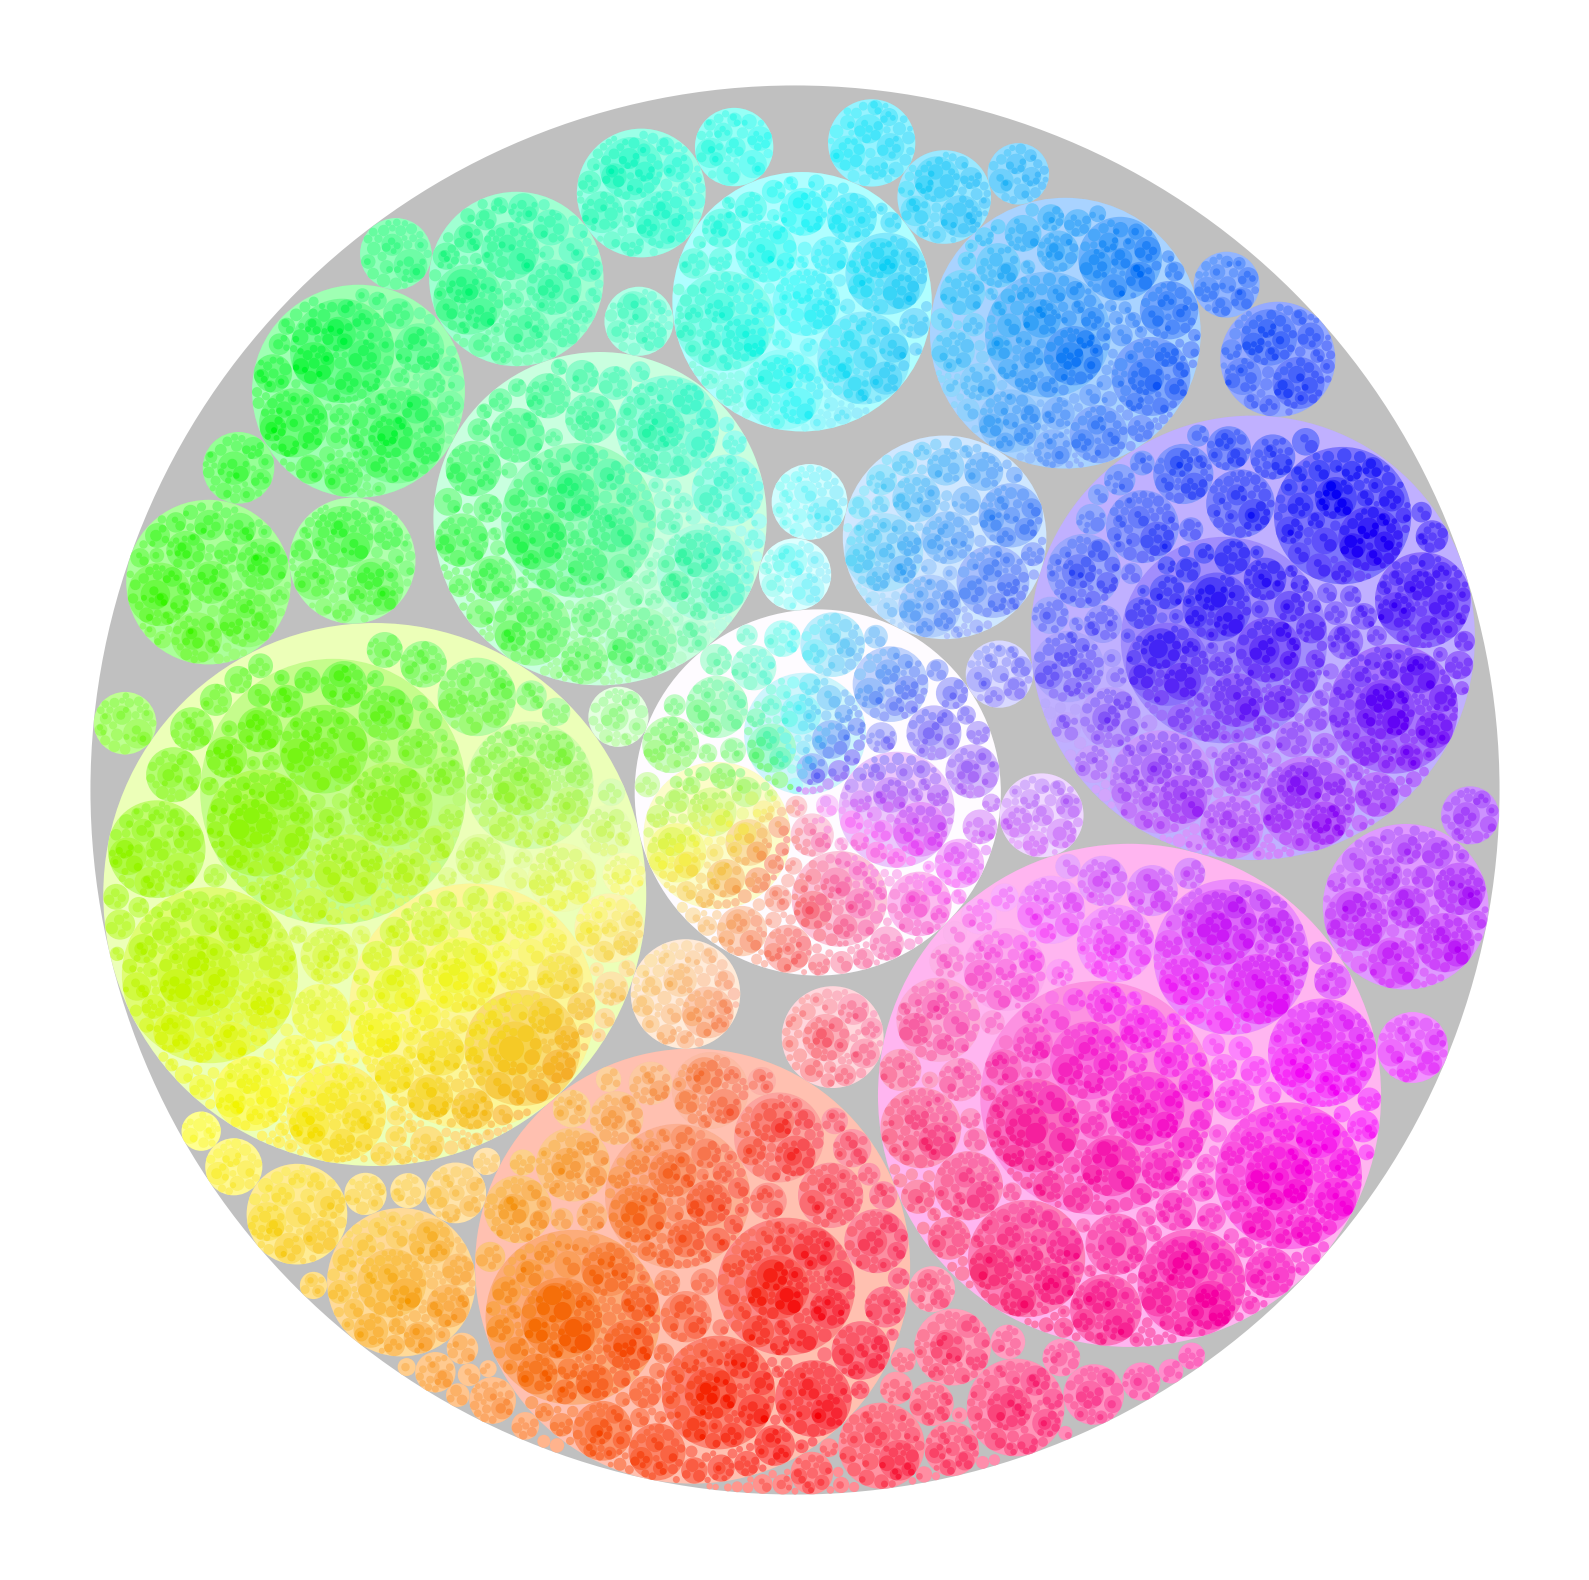

In [277]:

ax = pyplot.gca()
pyplot.gcf().set_size_inches(10, 10)
pyplot.axis('off')

ax.add_patch(pyplot.Circle((0, 0), 1, color="#c0c0c0", fill=True, linewidth=0))
minsize = 0.004

rs = np.random.RandomState(123)

def rec_add_patches(depth, co, ro): 
    #print(depth, co, ro)
    circles = all_circles[rs.randint(len(all_circles))]
    for c, r in circles: 
        c = co + c * ro
        r = r * ro
        if r < minsize: 
            continue
        x, y = c 
        rho, theta = np.hypot(x, y), np.arctan2(x, y)
        h = theta / (2 * np.pi) + 0.5
        s = np.clip(0.45 * rho + depth * 0.15, 0, 1)
        v = 0.99 ** depth
        
        color = colorsys.hsv_to_rgb(h, s, v)
        
        ax.add_patch(pyplot.Circle(c, r, color=color, fill=True, linewidth=0))
        
        color2 = colorsys.hsv_to_rgb(h, s, v / 2)
        ax.add_patch(pyplot.Circle(c, r, color=color2, fill=False, linewidth=0.001))

        
        if depth < 4: 
            rec_add_patches(depth + 1, c, r)

rec_add_patches(0, np.zeros(2), 1.0)

pyplot.axis("equal")
pyplot.savefig("test2.pdf")


## KDtree 

In [398]:
root = Node((-1, -1, 1, 1), path="")

for circle in circles:
    root.add_circle(circle)

In [357]:
str(circle)

'(array([ 0.00200651, -0.99991882]), 7.916521697962156e-05)'

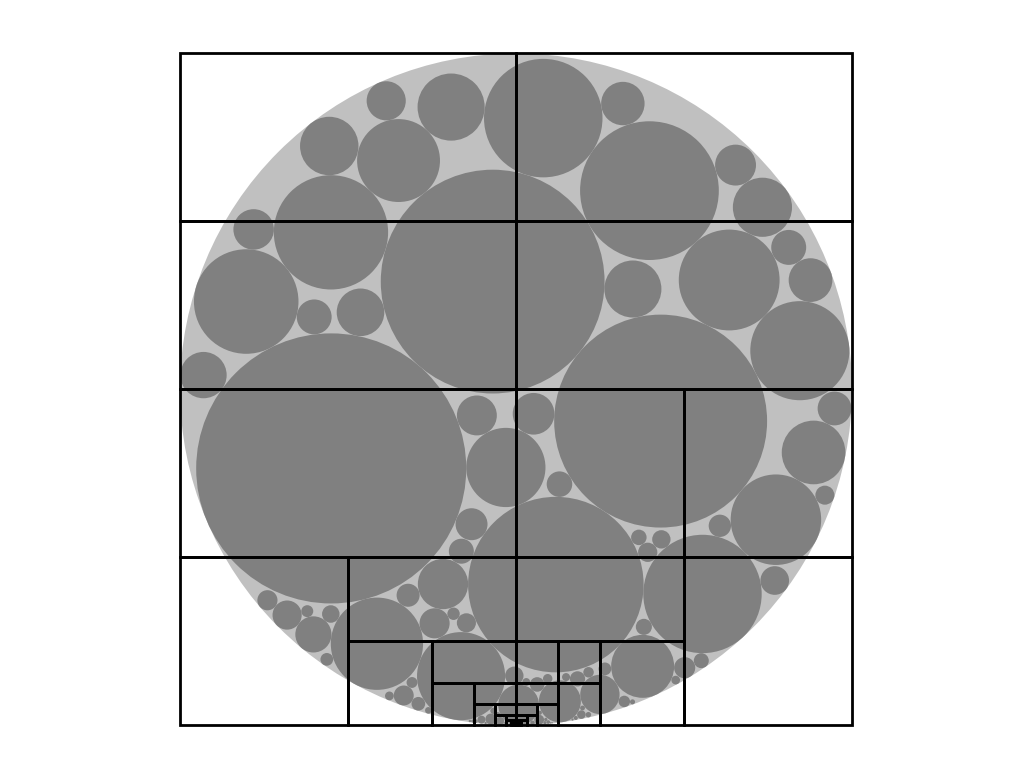

In [359]:

ax = pyplot.gca()
# pyplot.gcf().set_size_inches(7, 10)
pyplot.axis('off')

ax.add_patch(pyplot.Circle((0, 0), 1, color="#c0c0c0", fill=True, linewidth=0))

for c, r in circles: 
    x, y = c 
    ax.add_patch(pyplot.Circle(c, r, color="gray", fill=True, linewidth=0))

def draw_tree(root): 
    if root.is_leaf: 
        xmin, ymin, xmax, ymax = root.bbox
        ax.add_patch(pyplot.Rectangle(
            (xmin, ymin), xmax - xmin, ymax - ymin, 
            fill=False
        ))
    else: 
        draw_tree(root.child1)
        draw_tree(root.child2)
    
draw_tree(root)
    
pyplot.axis("equal")
pyplot.show()

# Construction with KDTree

In [145]:
def circles_intersect(cir1, cir2): 
    return norm(cir1.c - cir2.c) < cir1.r + cir2.r

def any_intersection(root, circle, exclude=None): 
    if exclude is None: 
        seen = set()
    else: 
        seen = set(exclude)
    for leaf in enumerate_intersecting_leaves(root, circle):
        for circle2 in leaf.circles: 
            # print(f"KDTREE {leaf.path} {circle} check {circle2}")

            if circle2 in seen: 
                continue
            seen.add(circle2)
            if circles_intersect(circle, circle2): 
                # print("    INTER")
                return True
    return False

def any_intersection_flat(circles, circle, exclude=None): 
    if exclude is None: 
        seen = set()
    else: 
        seen = set(exclude)
    for circle2 in circles: 
        if circle2 in seen: 
            continue
        # print(f"FLAT {circle} check {circle2}")
        if circles_intersect(circle, circle2): 
            # print("    INTER")
            return True
    return False


def generate_circles_gravity_kdtree(c0, r0, c1, r1, radiuses): 
    circles = [Circle(c1, r1, name=-1)]

    root = Node(
        (c0[0] - r0, c0[1] - r0, c0[0] + r0, c0[1] + r0),
        ""
    )
    root.add_circle(circles[0])
    
    tot1 = tot2 = 0
    for i, r3 in enumerate(radiuses): 
        # r3 = 0.25 * rs.rand() ** 3 + 0.01
        nc = len(circles)
        c3s = []
        
        # check contact with great circle 
        for k in range(nc): 
            cir2 = circles[k]
            for c3 in contact_3circle_inside(cir2.c, cir2.r, c0, r0, r3): 
                if not any_intersection(root, Circle(c3, r3), exclude=[circles[k]]):
                    c3s.append(c3)
                    tot2 += 1

        for j in range(nc):
            cir1 = circles[j]
            for k in range(j + 1, nc): 
                cir2 = circles[k]
                for c3 in contact_3cricle(cir1.c, cir1.r, cir2.c, cir2.r, r3): 
                    # check if intersection with other circles 
                    if not any_intersection(
                        root, Circle(c3, r3), 
                        exclude=[circles[k], circles[j]]):
                        if norm(c0 - c3) + r3 < r0: 
                            c3s.append(c3)
                            tot2 += 1
        if len(c3s) == 0: 
            continue
        # pick the c3 that has lowest y
        c3s.sort(key=lambda x: x[1])
        c3 = c3s[0]
        cir3 = Circle(c3, r3, name=i)
        circles.append(cir3)
        root.add_circle(cir3)
        print(f"{i=:} nb circles: {len(circles)} "
              f"nb c3: {len(c3s)} {tot1=:} {tot2=:}", end="\r", flush=True)
    # print()
    # root.display()
    return circles
        


In [147]:
rs = np.random.RandomState(123)

radiuses = [0.5 * rs.rand() ** 3 for _ in range(50)]
radiuses.sort(reverse=True)
r0 = radiuses[0]

circles_ref = generate_circles_gravity(
    np.array([0, 0]), 1,
    np.array([0, -1 + r0]), r0,
    radiuses[1:]
)
print()

circles_new = generate_circles_gravity_kdtree(
    np.array([0, 0]), 1,
    np.array([0, -1 + r0]), r0,
    radiuses[1:]
)


circles_ref_s = set((c[0], c[1], r) for (c, r) in circles_ref)
circles_new_s = set((cir.c[0], cir.c[1], cir.r) for cir in circles_new)
circles_ref_s == circles_new_s



i=48 nb circles: 41 nb c3: 158 tot1=91706 tot2=2394


True

# Rebut

In [437]:
!env  | grep conda

PATH=/Users/matthijs/miniconda3/envs/faiss_host_env/bin:/Users/matthijs/miniconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin
CONDA_EXE=/Users/matthijs/miniconda3/bin/conda
CONDA_PYTHON_EXE=/Users/matthijs/miniconda3/bin/python
CONDA_PREFIX=/Users/matthijs/miniconda3/envs/faiss_host_env


In [ ]:

def generate_circles_gravity_kdtree(c0, r0, c1, r1, radiuses): 
    """
    Great circle is (c0, r0)
    First circle inside great circle is (c1, r1)
    """
    circles = [Circle(c1, r1)]

    root = Node(
        (c1[0] - r1, c1[1] - r1, 2 * r1, 2 * r1), 
        ""
    )
    root.add_circle(circles[0])
    
    for i, r3 in enumerate(radiuses): 
        nc = len(circles)
        
        # possible centers for the new circle with radius r3
        c3s = []
        
        # check contact with great circle + another circle 
        for k in range(nc): 
            c2 = circles[k]
            for c3 in contact_3circle_inside(c2.c, c2.r, c0, r0, r3): 
                circle3 = Circle(c3, r3)
                # print(f"+++++++++ handle {circle3}")

                any_inter = any_intersection(root, circle3, exclude=[c2])
                # any_inter_ref = any_intersection_flat(circles, circle3, exclude=[c2])
                # assert any_inter_ref == any_inter
                
                if not any_inter: 
                    c3s.append(c3)
                    
        seen = set()
        
        def handle_circle_pair(circle1, circle2): 
            if (circle1, circle2) in seen or (circle2, circle1) in seen: 
                return 
            seen.add((circle1, circle2))
            for c3 in contact_3cricle(circle1.c, circle1.r, circle2.c, circle2.r, r3): 
                if not any_intersection(root, Circle(c3, r3), exclude=[circle1, circle2]):
                    c3s.append(c3)            
        
        # handle pairs of circles within a leaf 
        for leaf in enumerate_leaves(root): 
            nc = len(leaf.circles)
            for i in range(nc): 
                ci = leaf.circles[i]
                for j in range(1, nc):
                    handle_circle_pair(ci, leaf.circles[j])
        
        # handle pairs of circles within 2 leaves
        for leaf1, leaf2 in enumerate_pairs(root, 2 * r3): 
            for ci in leaf1.circles: 
                for cj in leaf2.circles: 
                    if ci != cj: 
                        handle_circle_pair(ci, cj)

        if len(c3s) == 0: 
            continue

        # pick the c3 that has lowest y
        c3s.sort(key=lambda x: x[1])
        c3 = c3s[0]
        circle3 = Circle(c3, r3)
        circles.append(circle3)
        root.add_circle(circle3)
        print(f"{i=:} nb circles: {len(circles)} "
              f"nb c3: {len(c3s)}", end="\r", flush=True)

    return circles
        